In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import os

In [197]:
data=pd.read_csv("ipl_2022_deliveries.csv")
data.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana


In [198]:
print("DataTypes")
data.dtypes

DataTypes


match_id              int64
season                int64
match_no              int64
date                 object
venue                object
batting_team         object
bowling_team         object
innings               int64
over                float64
striker              object
bowler               object
runs_of_bat           int64
extras                int64
wide                  int64
legbyes               int64
byes                  int64
noballs               int64
wicket_type          object
player_dismissed     object
fielder              object
dtype: object

In [199]:
#nan means not a number generally having float as its string type but here its object(string) because its stored as "nan"
missing_values=data.isnull().sum()
print(missing_values)
data.drop_duplicates(inplace=True)

match_id                0
season                  0
match_no                0
date                    0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         17001
player_dismissed    17005
fielder             17183
dtype: int64


In [200]:
data.head()
missing_values=data.isnull().sum()
print(missing_values)

match_id                0
season                  0
match_no                0
date                    0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         16967
player_dismissed    16971
fielder             17149
dtype: int64


In [201]:
print(data.describe)

<bound method NDFrame.describe of        match_id  season  match_no          date  \
0        202201    2022         1  Mar 26, 2022   
1        202201    2022         1  Mar 26, 2022   
2        202201    2022         1  Mar 26, 2022   
3        202201    2022         1  Mar 26, 2022   
4        202201    2022         1  Mar 26, 2022   
...         ...     ...       ...           ...   
17907    202274    2022        74  May 29, 2022   
17908    202274    2022        74  May 29, 2022   
17909    202274    2022        74  May 29, 2022   
17910    202274    2022        74  May 29, 2022   
17911    202274    2022        74  May 29, 2022   

                                  venue batting_team bowling_team  innings  \
0              Wankhede Stadium, Mumbai          CSK          KKR        1   
1              Wankhede Stadium, Mumbai          CSK          KKR        1   
2              Wankhede Stadium, Mumbai          CSK          KKR        1   
3              Wankhede Stadium, Mumbai  

In [202]:
print("hi")

hi


In [203]:
# this will return the list of columns containing only string as values and for numerical put "number"
categorical_column=data.select_dtypes(include=['object']).columns 
for i in categorical_column:
    print(f"{i}:{data[i].nunique()} unique values")
    
    
#example to get the list of unique values    

#in this unique() function i will get nan to not get nan we can drop nan from output using .dropna().unique()
print(data["wicket_type"].dropna().unique())

date:62 unique values
venue:6 unique values
batting_team:10 unique values
bowling_team:10 unique values
striker:174 unique values
bowler:125 unique values
wicket_type:7 unique values
player_dismissed:164 unique values
fielder:200 unique values
['caught' 'stumped' 'runout' 'bowled' 'lbw' 'retired out' 'hit wicket']


[nan 'caught' 'stumped' 'runout' 'bowled' 'lbw' 'retired out' 'hit wicket']


In [204]:
data = data.fillna(0)
total_runs_ipl=data["runs_of_bat"]+data["extras"]+data["wide"]+data["legbyes"]+data["byes"]+data["noballs"]
data["total_runs_ipl"] = total_runs_ipl
total_runs = sum(data["total_runs_ipl"])
print(f"Total runs scored in IPL 2022 is {total_runs}")


Total runs scored in IPL 2022 is 25375


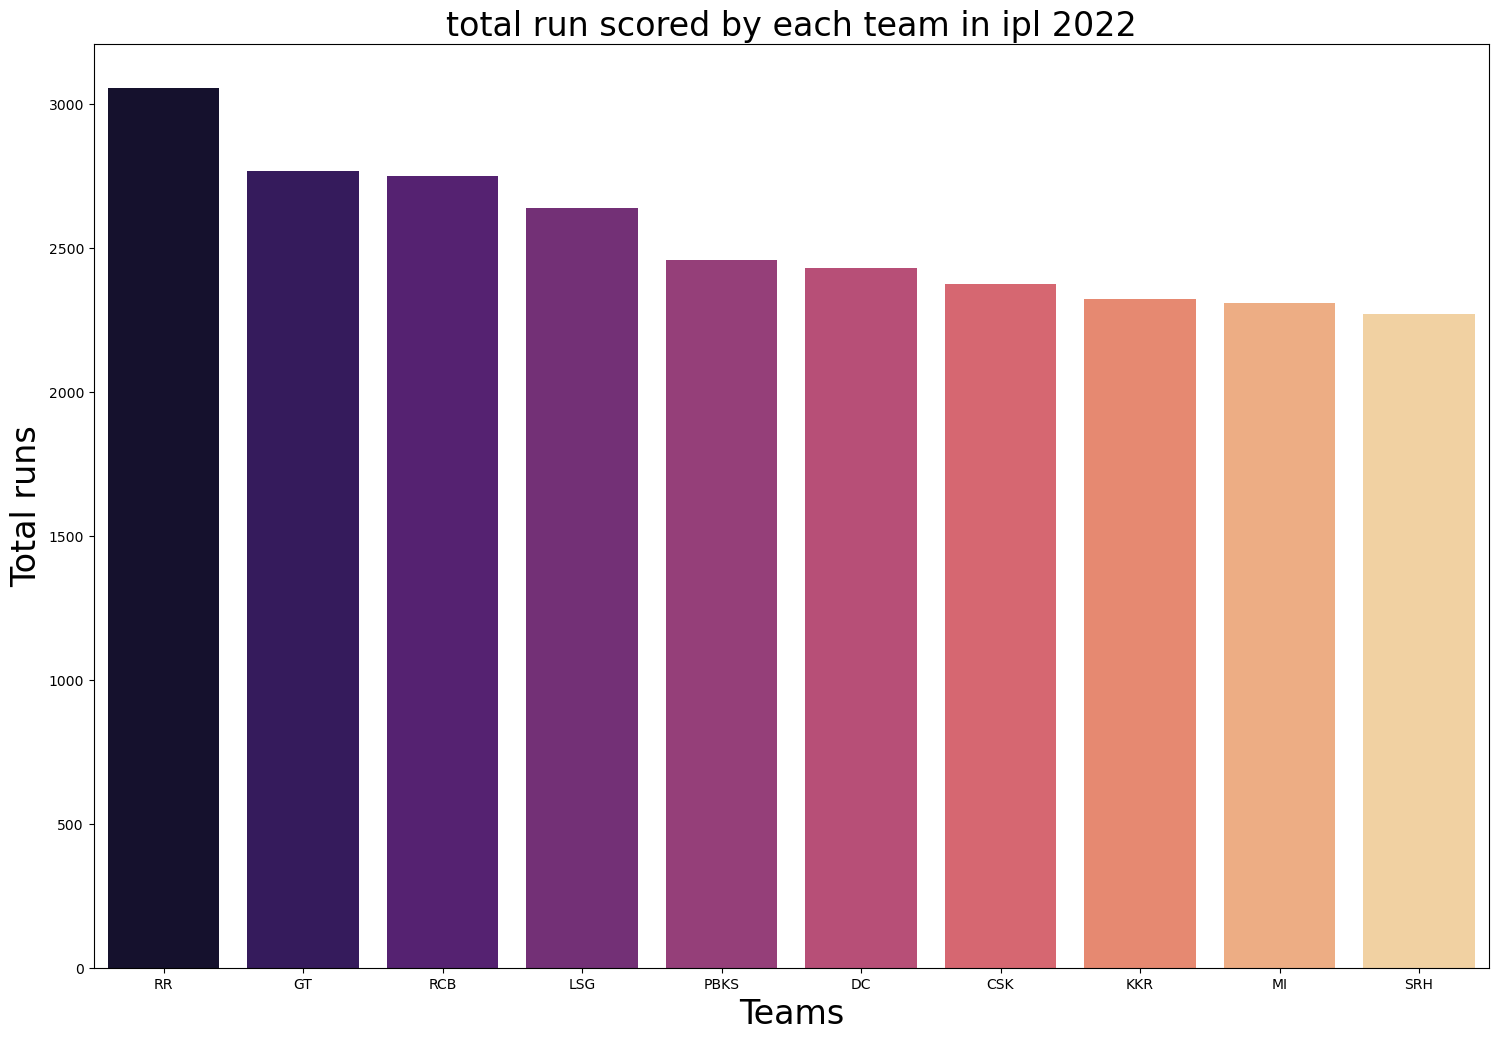

In [205]:
# total run scored by each team in ipl 2022
# .reset_index() is very important becaue When you perform operations 
#like grouping or filtering data, the original index may no longer be meaningful or may not follow a sequential pattern.
#The .reset_index() method is typically used after such operations to restore the default integer index, starting from 0,
#and move the original index (if it exists) into a new column in the DataFrame


team_run=data.groupby('batting_team')['total_runs_ipl'].sum().reset_index()
plt.figure(figsize=(18, 12))

# this will produce random team without any order of ascending or descending
#to get in ascending or descending order 
team_run=team_run.sort_values(by="total_runs_ipl",ascending=False)

sns.barplot(x="batting_team",y="total_runs_ipl", data=team_run,palette="magma")
plt.title("total run scored by each team in ipl 2022",fontsize=24)
plt.xlabel("Teams",fontsize=24)
plt.ylabel("Total runs",fontsize=24)
plt.show()

In [206]:
# average runs scored by each team 

avg_run_by_team = data.groupby("batting_team")['total_runs_ipl'].mean().reset_index()
avg_run_by_team = avg_run_by_team.sort_values(by="total_runs_ipl", ascending=False)
fig = px.bar(avg_run_by_team, x="batting_team", y="total_runs_ipl", title="Average runs scored by each team in IPL 2022")
fig.update_layout(width=900, height=500)
fig.show()

total wickets taken in ipl 2022 is = 911


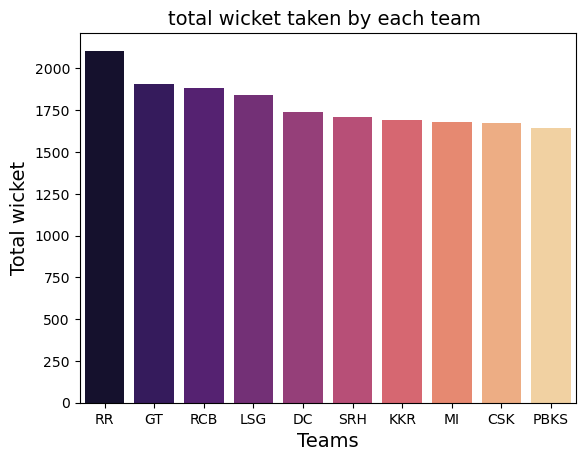

In [207]:
# total wicket take  by each team 

#total wicket in ipl 
#types of wicket
#['caught' 'stumped' 'runout' 'bowled' 'lbw' 'retired out' 'hit wicket']



types = ['caught', 'stumped', 'runout', 'bowled', 'lbw', 'retired out', 'hit wicket']
total_wickets_ipl= 0
for i in data["wicket_type"]:
    if i in types:
        total_wickets_ipl += 1
print(f"total wickets taken in ipl 2022 is = {total_wickets_ipl}")

#this wixkets generate the data in which there is no nan values only valid values 
wickets=data[data["wicket_type"].notnull()]
# wickets

#total wicket taken by each team

team_wicket=wickets.groupby("bowling_team")["wicket_type"].count().reset_index()
team_wicket=team_wicket.sort_values(by="wicket_type",ascending=False)
sns.barplot(x="bowling_team",y="wicket_type", data=team_wicket,palette="magma")
plt.title("total wicket taken by each team ",fontsize=14)
plt.xlabel("Teams",fontsize=14)
plt.ylabel("Total wicket",fontsize=14)
plt.show()




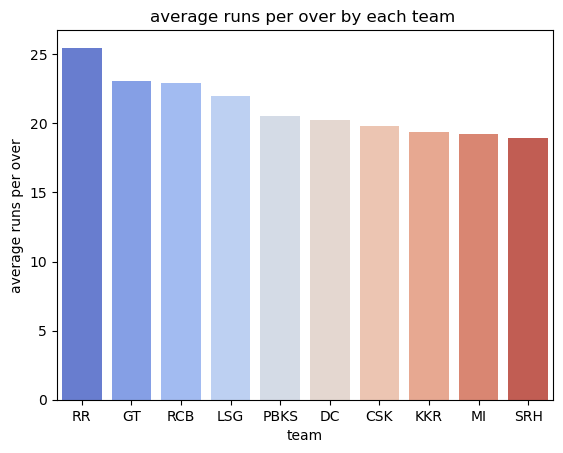

In [215]:
# average runs per  over by each team
data.head()
team_runs_per_over=data.groupby(['batting_team','over'])['total_runs_ipl'].sum().reset_index()
team_avg_runs_per_over=team_runs_per_over.groupby('batting_team')['total_runs_ipl'].mean().reset_index()
team_avg_runs_per_over=team_avg_runs_per_over.sort_values(by='total_runs_ipl',ascending=False)

sns.barplot(x="batting_team",y="total_runs_ipl",data=team_avg_runs_per_over,palette='coolwarm')

plt.title("average runs per over by each team ")
plt.xlabel("team")
plt.ylabel("average runs per over")
plt.show()

top scorer for the ipl 2022
             striker  runs_of_bat
22           Buttler          863
110            Rahul          616
171          de Kock          508
40     Hardik Pandya          487
144     Shubman Gill          483
80            Miller          481
172       du Plessis          468
31            Dhawan          460
129           Samson          458
48             Hooda          451
70       Livingstone          437
166           Warner          432
4    Abhishek Sharma          426
51      Ishan Kishan          418
154         Tripathi          413
143     Shreyas Iyer          401
152      Tilak Varma          397
76           Markram          381
96          Padikkal          376
38           Gaikwad          368


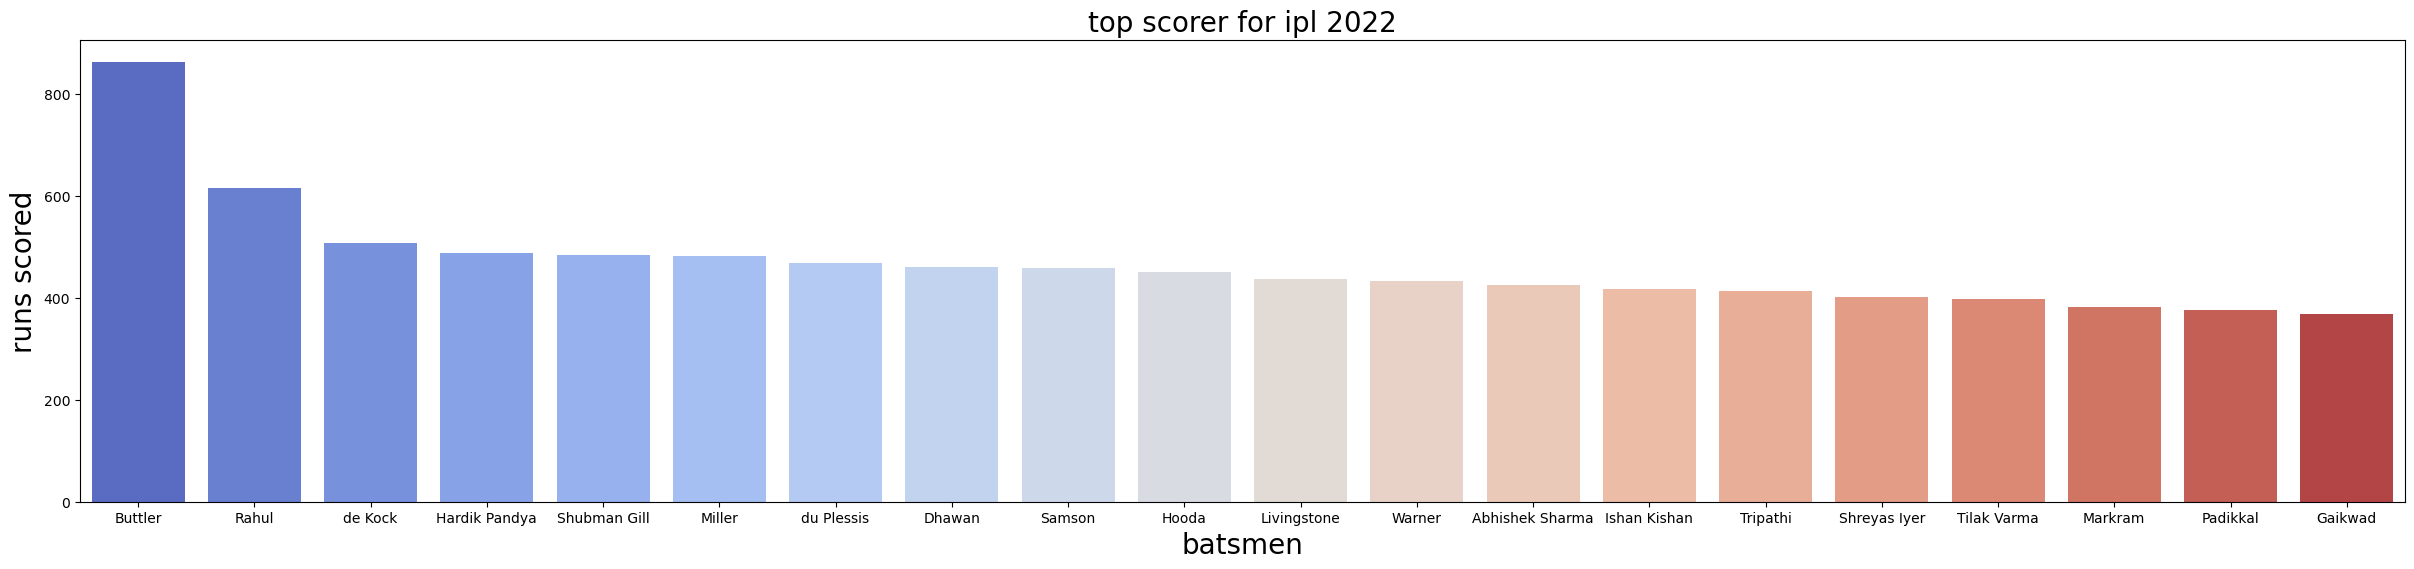

poor scorer of ipl 2022
              striker  runs_of_bat
90      Navdeep Saini            2
52          J Suchith            2
35   Fazalhaq Farooqi            2
147           Southee            2
43       Harshit Rana            2
130           Sangwan            2
93             Nortje            1
27       Coulter-Nile            1
89       Nathan Ellis            0
119      Ravi Bishnoi            0
21             Bumrah            0
10         Anukul Roy            0
156       Tymal Mills            0
65        Kuldeep Sen            0
39            Gowtham            0
79           Meredith            0
170        Yash Dayal            0
5          Akash Deep            0
131      Sanjay Yadav            0
62      Khaleel Ahmed            0


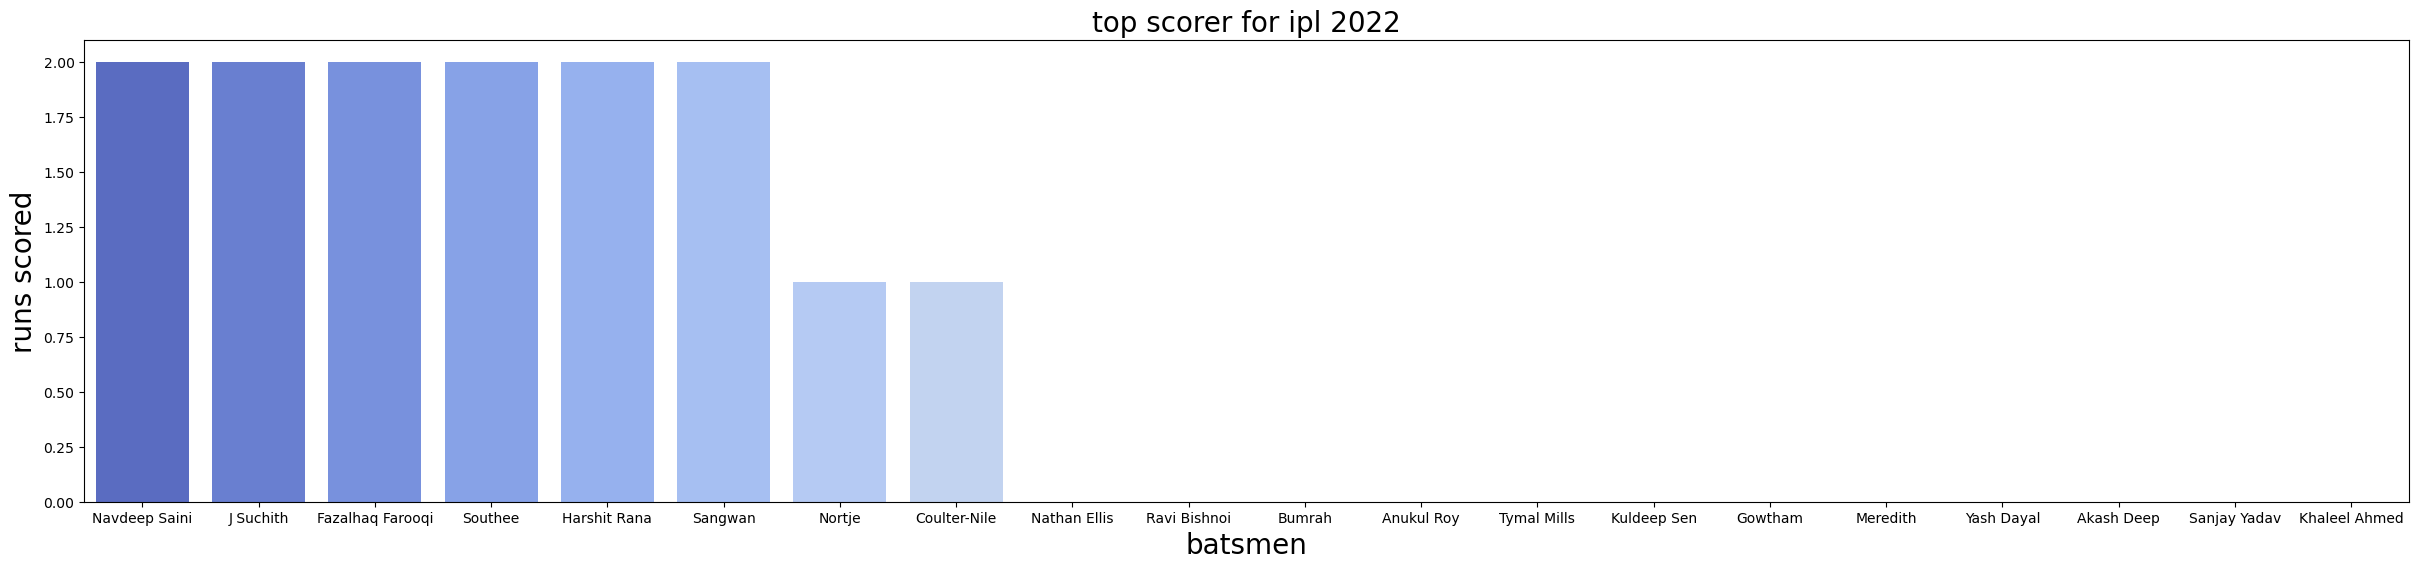

In [235]:
#top 20 batsmen in ipl run wise here batsmen is denoted as striker
batsmen_runs=data.groupby("striker")['runs_of_bat'].sum().reset_index()

#in this if you remove the head(20) then it will print all the batsmen 
print("top scorer for the ipl 2022")
top_batsmen_runs=batsmen_runs.sort_values(by='runs_of_bat', ascending=False).head(20)
print(top_batsmen_runs.head(20))

plt.figure(figsize=(30, 6))
sns.barplot(x="striker",y="runs_of_bat",data=top_batsmen_runs,palette="coolwarm")
plt.title("top scorer for ipl 2022",fontsize=20)
plt.xlabel("batsmen",fontsize=20)
plt.ylabel("runs scored",fontsize=20)
plt.show()


#in this last 20 batsmen who performed very poorely
print("poor scorer of ipl 2022")
poor_batsmen_runs=batsmen_runs.sort_values(by='runs_of_bat', ascending=False).tail(20)
print(poor_batsmen_runs.tail(20))
plt.figure(figsize=(30, 6))
sns.barplot(x="striker",y="runs_of_bat",data=poor_batsmen_runs,palette="coolwarm")
plt.title("top scorer for ipl 2022",fontsize=20)
plt.xlabel("batsmen",fontsize=20)
plt.ylabel("runs scored",fontsize=20)
plt.show()

In [240]:
#top scorer in ipl 2022 with team , runs, and strike rate
top_run_scorer=data.groupby("striker").agg(T=('batting_team',lambda x:x.unique()[0]),
                                             M=('match_id',lambda x:len(x.unique())),
                                            runs=("runs_of_bat","sum"),
                                          sr=("runs_of_bat",lambda x:(x.mean()*100)),
                                          ).sort_values(by=["runs","sr"],ascending=False).reset_index()
top_run_scorer.index+=1
top_run_scorer[:20]


,striker,T,M,runs,sr
1,Buttler,RR,17,863,144.798658
2,Rahul,LSG,14,616,131.063830
3,de Kock,LSG,15,508,145.558739
4,Hardik Pandya,GT,15,487,125.839793
5,Shubman Gill,GT,16,483,129.144385
6,Miller,GT,16,481,138.218391
7,du Plessis,RCB,16,468,124.137931
8,Dhawan,PBKS,14,460,117.048346
9,Samson,RR,17,458,142.679128
10,Hooda,LSG,14,451,132.647059


In [275]:
# top batsmen boundary wise

#top batsmen with maximum four 
fours=data[data["runs_of_bat"]==4].groupby("striker")["runs_of_bat"].count().reset_index()
fours=fours.sort_values(by="runs_of_bat",ascending=False).head(10)
fours.reset_index(drop=True ,inplace=True)
fours.index+=1
fours


,striker,runs_of_bat
1,Buttler,84
2,Warner,52
3,Shubman Gill,51
4,du Plessis,49
5,Hardik Pandya,49
6,Abhishek Sharma,47
7,de Kock,47
8,Dhawan,47
9,Rahul,45
10,Ishan Kishan,45


In [274]:

#top batsmen with maximum sixes
sixes=data[data["runs_of_bat"]==6].groupby("striker")["runs_of_bat"].count().reset_index()
sixes=sixes.sort_values(by="runs_of_bat",ascending=False).head(10)
sixes.reset_index(drop=True ,inplace=True)
sixes.index+=1
sixes

,striker,runs_of_bat
1,Buttler,45
2,Livingstone,34
3,Russell,32
4,Rahul,30
5,Samson,26
6,Miller,23
7,de Kock,23
8,Nitish Rana,22
9,Karthik,22
10,Powell,22


In [272]:
#maximum baoundary  by batsmen


fours=data[data["runs_of_bat"]==4].groupby("striker")["runs_of_bat"].count().reset_index()
fours=fours.sort_values(by="runs_of_bat",ascending=False)

#this line changes the runs_of_bats to fours so that its easy to interpret 
fours.rename(columns={'runs_of_bat': 'fours'}, inplace=True)

sixes=data[data["runs_of_bat"]==6].groupby("striker")["runs_of_bat"].count().reset_index()
sixes=sixes.sort_values(by="runs_of_bat",ascending=False)

#this line changes the runs_of_bats to sixes so that its easy to interpret 
sixes.rename(columns={'runs_of_bat': 'sixes'}, inplace=True)

boundary=pd.merge(fours,sixes,on="striker",how="outer").fillna(0)
boundary["total_boundary"]=boundary["fours"]+boundary["sixes"]
boundary=boundary.sort_values(by="total_boundary", ascending=0).head(10)
boundary.reset_index(drop=True, inplace=True)
boundary.index += 1
print(boundary)




            striker  fours  sixes  total_boundary
1           Buttler   84.0   45.0           129.0
2             Rahul   45.0   30.0            75.0
3           de Kock   47.0   23.0            70.0
4            Samson   43.0   26.0            69.0
5            Warner   52.0   15.0            67.0
6       Livingstone   29.0   34.0            63.0
7        du Plessis   49.0   13.0            62.0
8      Shubman Gill   51.0   11.0            62.0
9     Hardik Pandya   49.0   12.0            61.0
10  Abhishek Sharma   47.0   13.0            60.0


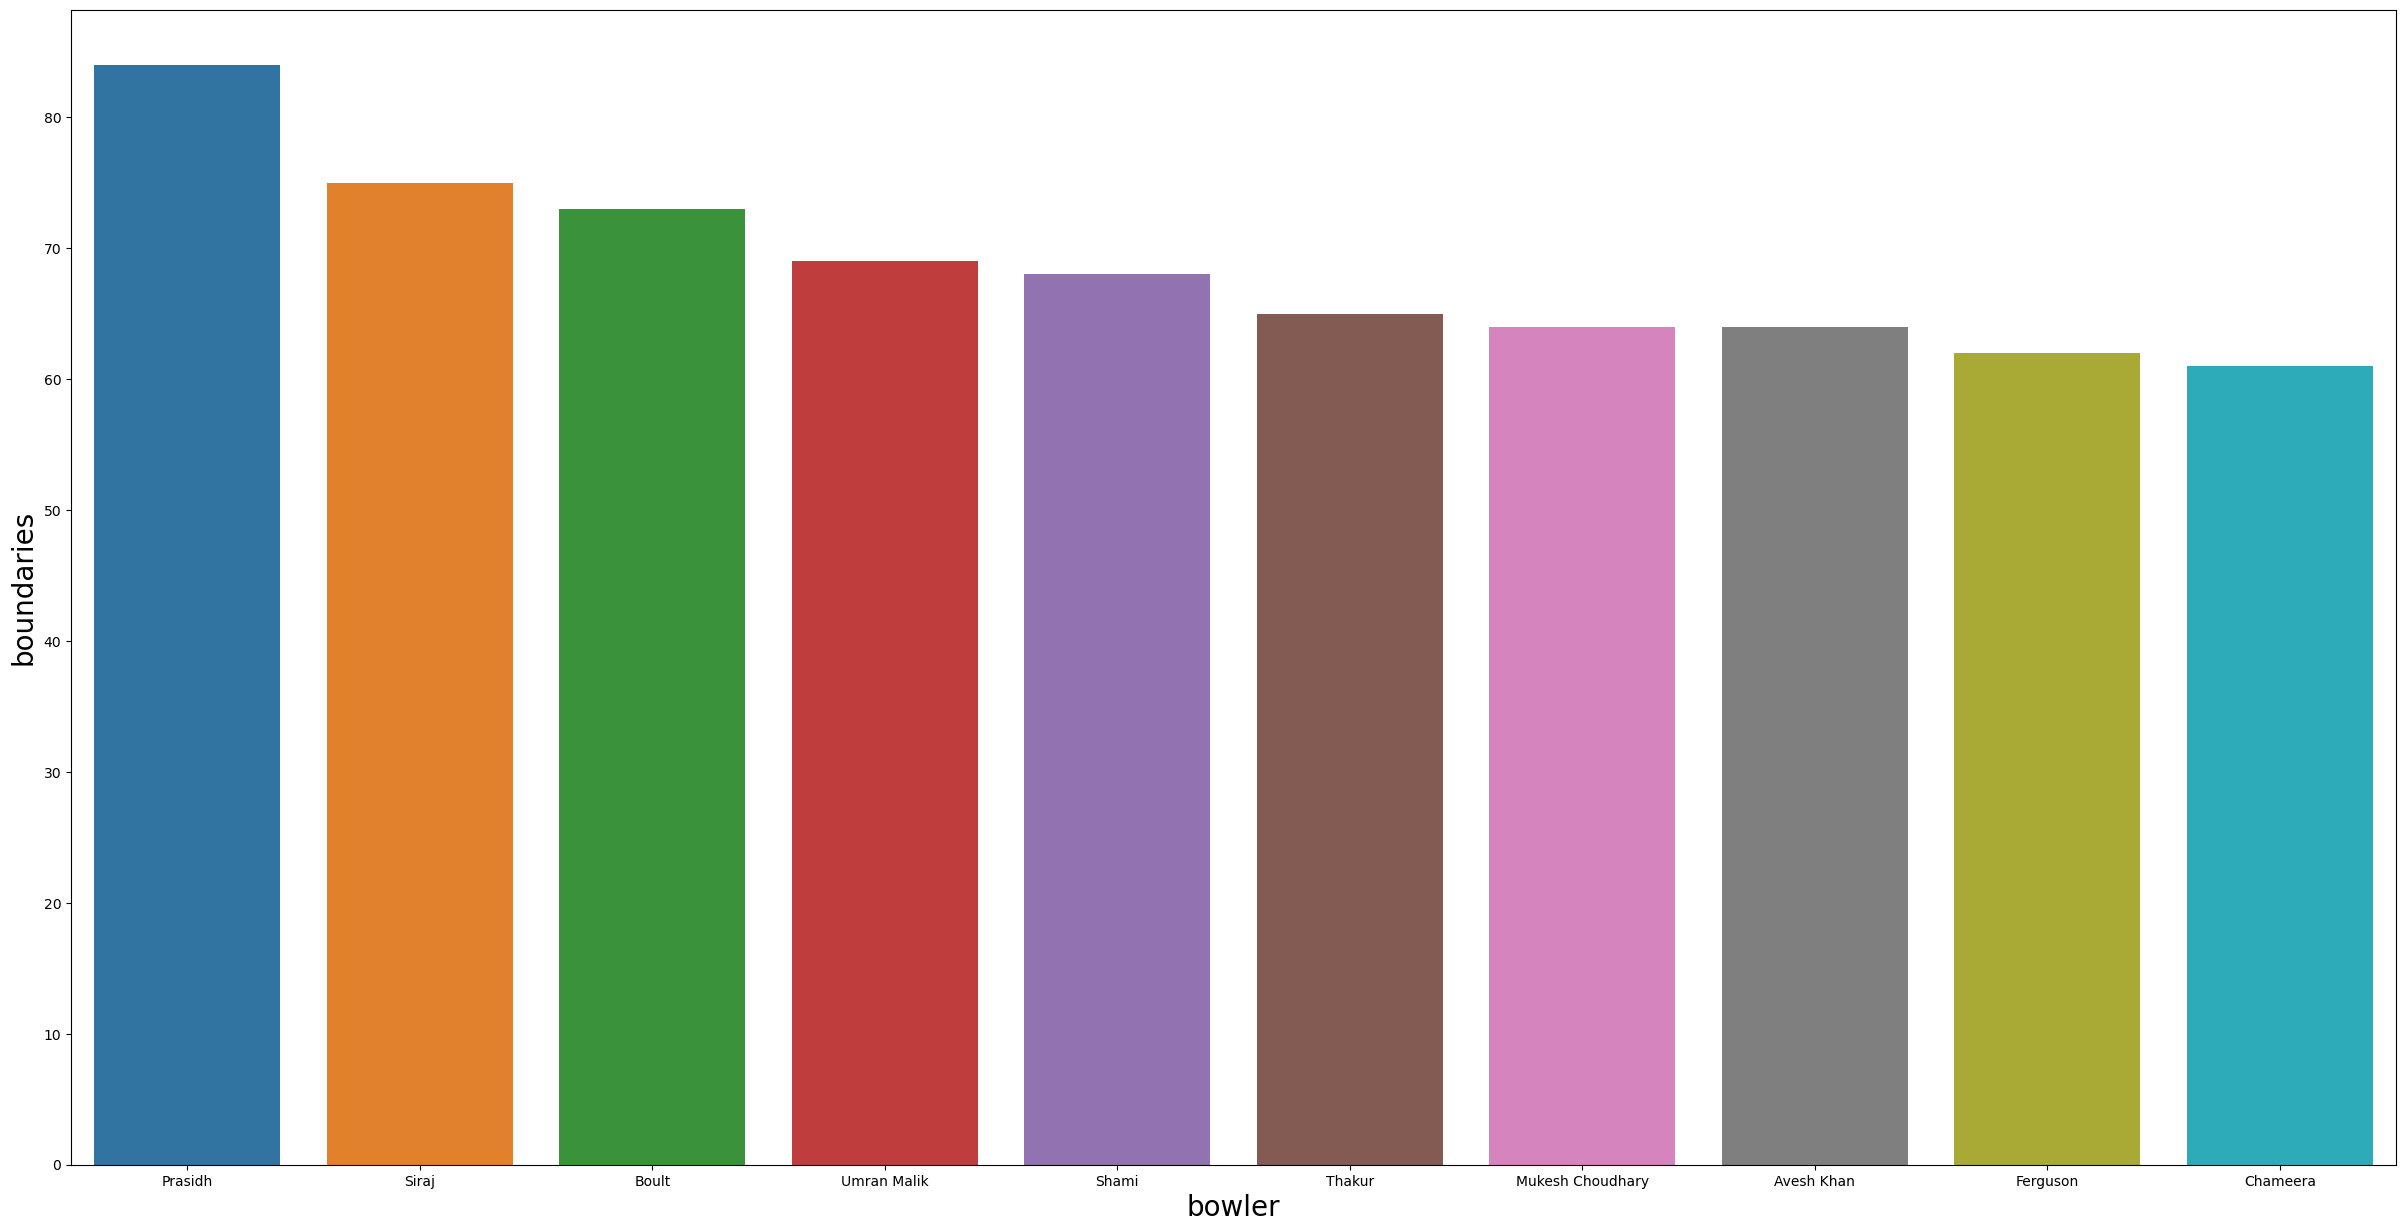

In [299]:
# bowlers who was hit by maximum baoundaries


fours=data[data["runs_of_bat"]==4].groupby("bowler")["runs_of_bat"].count().reset_index()
fours.rename(columns={'runs_of_bat': 'fours'}, inplace=True)
# fours.head(10)

sixes=data[data["runs_of_bat"]==6].groupby("bowler")["runs_of_bat"].count().reset_index()
sixes.rename(columns={'runs_of_bat': 'sixes'}, inplace=True)
# sixes.head(10)

plt.figure(figsize=(30, 15))
boundary=pd.merge(fours,sixes,on="bowler",how="outer").fillna(0)
boundary["total_boundary"]=boundary["fours"]+boundary["sixes"]
boundary=boundary.sort_values(by="total_boundary",ascending=False)
top=boundary.head(10)

sns.barplot(x="bowler",y="total_boundary",data=top)
plt.xlabel("bowler",fontsize=20)
plt.ylabel("boundaries",fontsize=20)
plt.show()

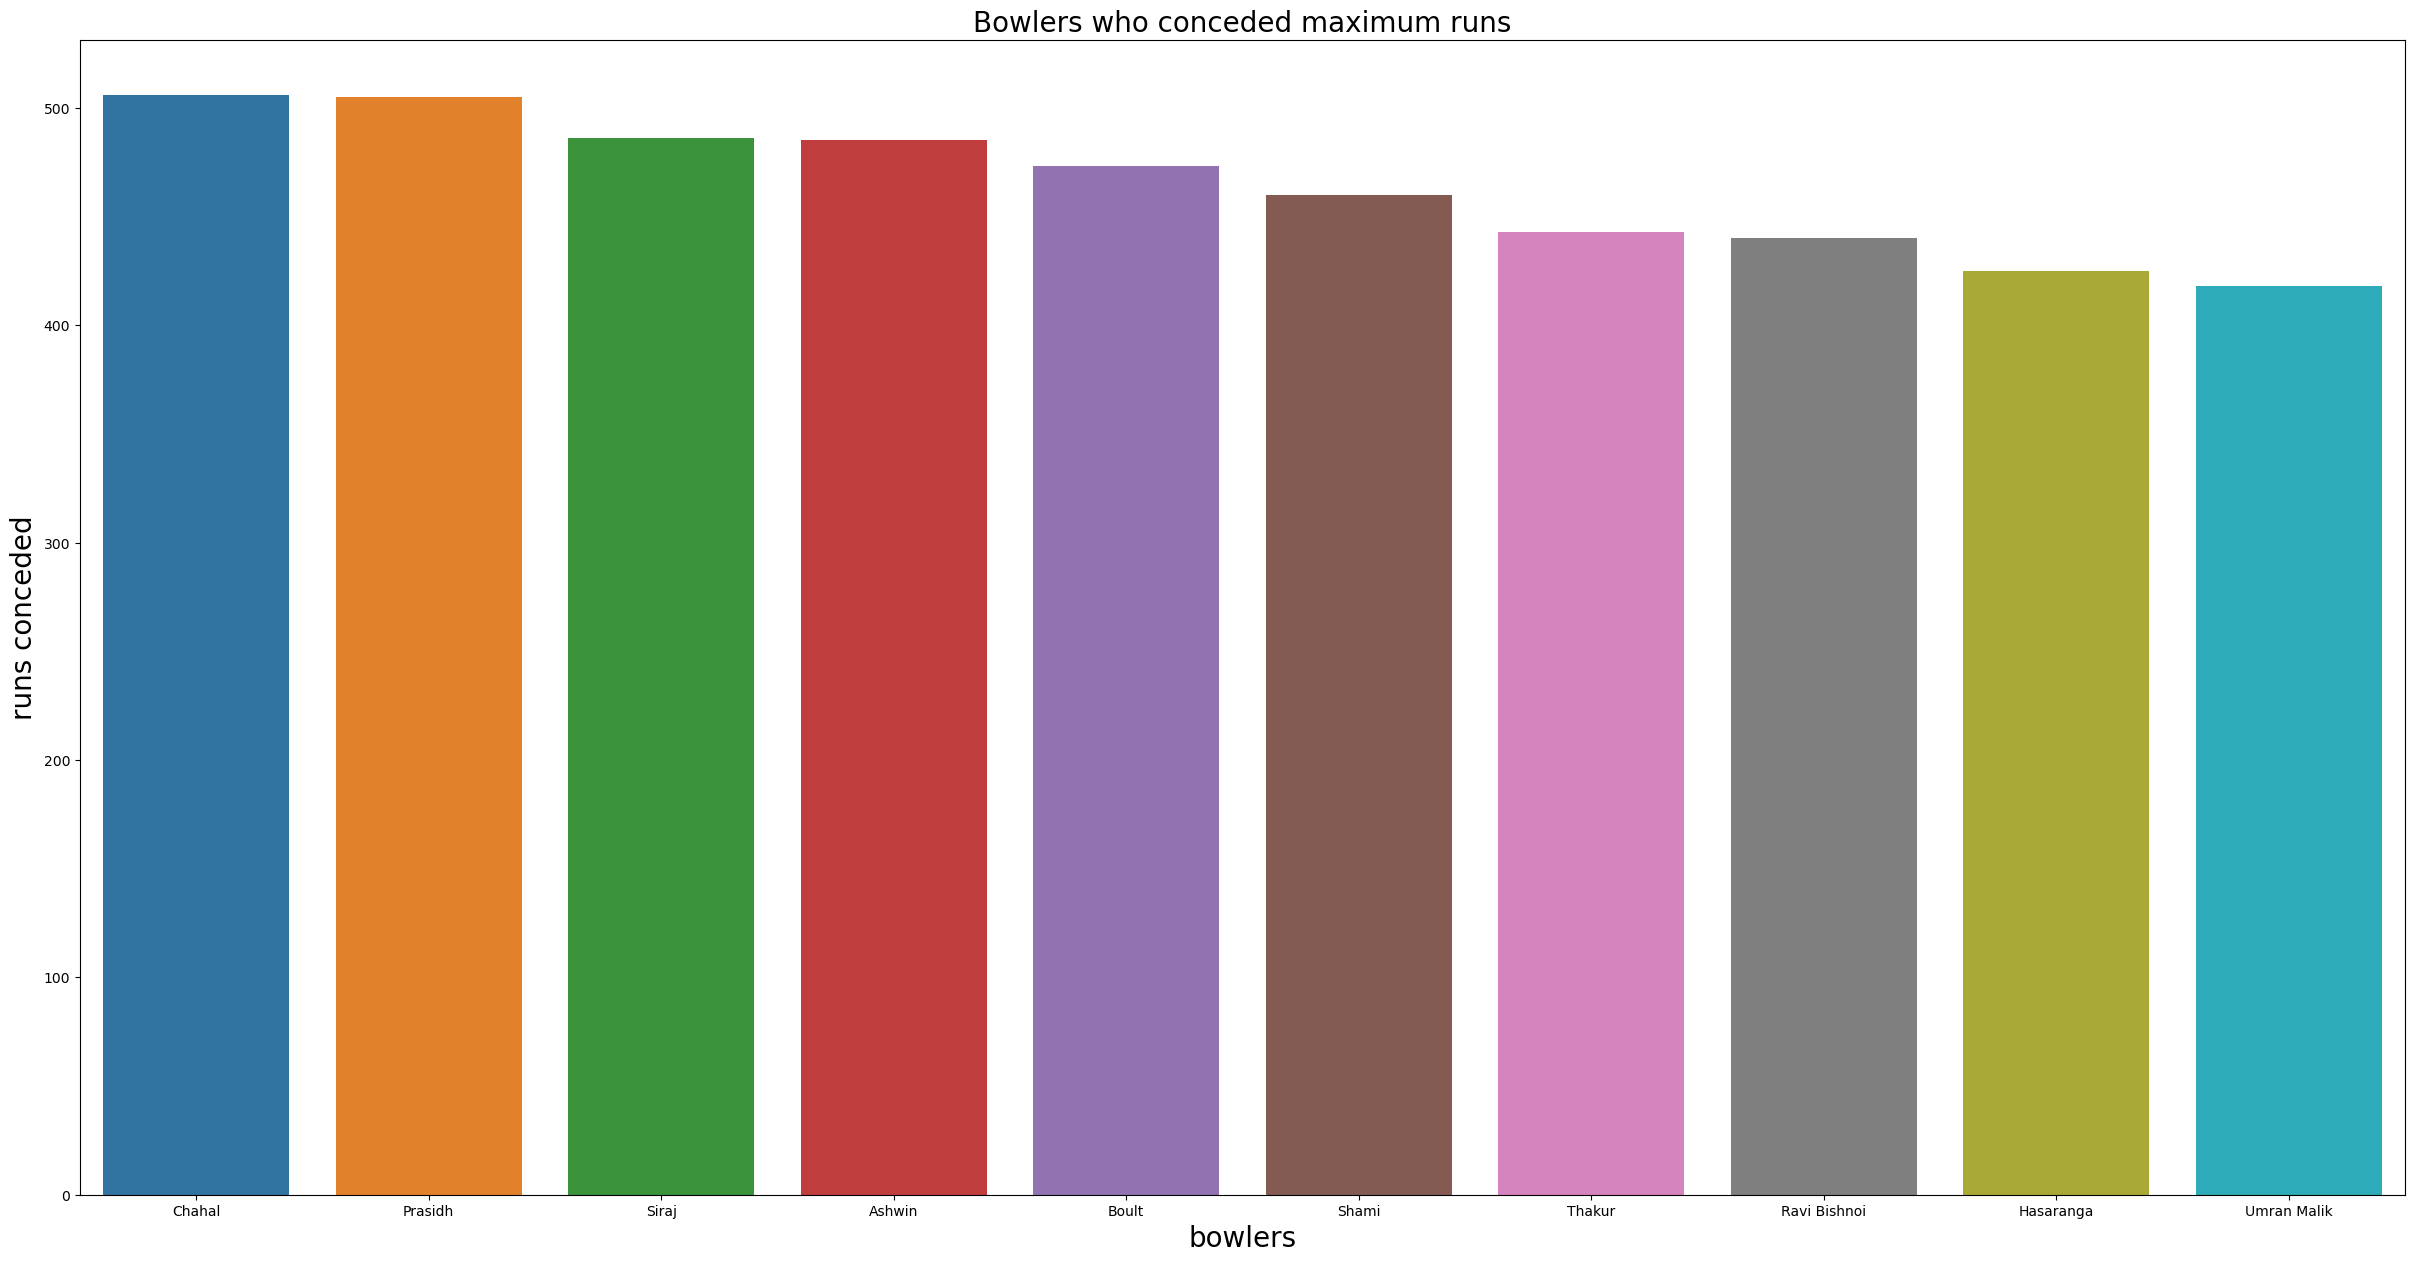

In [314]:
#top bolwers who conceded least runs
bowlers=data.groupby("bowler")["runs_of_bat"].sum().reset_index()
bowlers=bowlers.sort_values(by="runs_of_bat",ascending=False).head(10)
bowlers.reset_index(drop=True, inplace=True)
bowlers.index+=1
bowlers.head(10)

#graph showing the bowlers with maximum runs
plt.figure(figsize=(30, 15))
sns.barplot(x="bowler",y="runs_of_bat",data=bowlers)
plt.xlabel("bowlers",fontsize=20)
plt.ylabel("runs conceded", fontsize=20)
plt.title("Bowlers who conceded maximum runs",fontsize=20)
plt.show()

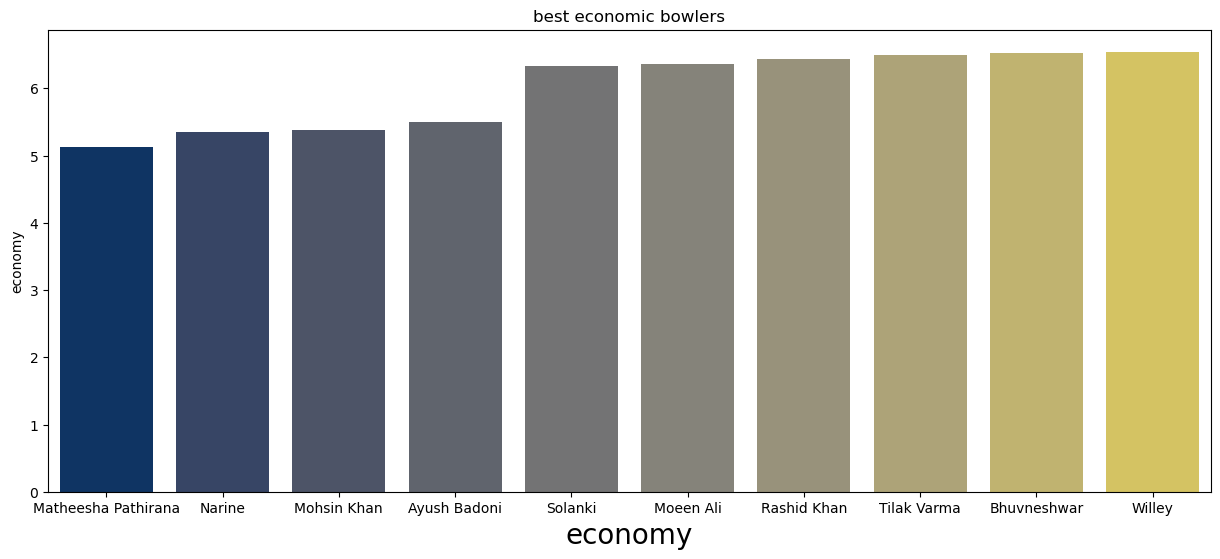

In [333]:
#top bowlers by economy rate 

#calculating the numbers of over bowled by each bowler
ball_bowled=data.groupby("bowler")["match_id"].count().reset_index()
ball_bowled.columns=["bowler","bowls_bowled"]
ball_bowled["over"]=ball_bowled["bowls_bowled"]/6
ball_bowled

#calculating the runs conceded by the each bowler
bowler_runs_conceded=data.groupby("bowler")["runs_of_bat"].sum().reset_index()
bowler_runs_conceded


#calculating the economy of bowler
bowler_economy=pd.merge(ball_bowled,bowler_runs_conceded,on="bowler")
bowler_economy["economy"]=bowler_economy["runs_of_bat"]/bowler_economy["over"]
bowler_economy=bowler_economy.sort_values(by="economy",ascending=True).head(10)
bowler_economy.reset_index(drop=True,inplace=True)
bowler_economy.index+=1
# bowler_economy



#making the graph for the best economic bowlers
plt.figure(figsize=(15, 6))
sns.barplot(x="bowler",y="economy",data=bowler_economy,palette="cividis")
plt.title("best economic bowlers")
plt.xlabel("bowlers",fontsize=20)
plt.xlabel("economy",fontsize=20)
plt.show()



In [344]:
# facts about bowlers
#bowler who gave maximum extra runs 
top_extras_bowlers=data.groupby("bowler")["extras"].sum().reset_index().head(10)
top_extras_bowlers=top_extras_bowlers.sort_values(by="extras",ascending=False)
top_extras_bowlers.reset_index(drop=False,inplace=True)
top_extras_bowlers.index+=1
top_extras_bowlers

,index,bowler,extras
1,8,Arshdeep Singh,38
2,9,Ashwin,20
3,5,Alzarri Joseph,11
4,4,Akash Deep,5
5,0,Aaron,4
6,1,Abbott,3
7,3,Abhishek Sharma,1
8,2,Abdul Samad,0
9,6,Aman Hakim Khan,0
10,7,Anukul Roy,0


In [345]:
#bolwer who threw maximum wide bowls
maximum_wide=data.groupby("bowler")["wide"].sum().reset_index().head(10)
maximum_wide=maximum_wide.sort_values(by="wide",ascending=False)
maximum_wide.reset_index(drop=False,inplace=True)
maximum_wide.index+=1
maximum_wide


,index,bowler,wide
1,9,Ashwin,15
2,8,Arshdeep Singh,13
3,5,Alzarri Joseph,4
4,0,Aaron,3
5,1,Abbott,3
6,4,Akash Deep,2
7,2,Abdul Samad,0
8,3,Abhishek Sharma,0
9,6,Aman Hakim Khan,0
10,7,Anukul Roy,0


In [363]:
#top venue based on the run scored
top_venue=data.groupby(["venue","match_id"])["runs_of_bat"].sum().reset_index().head(10)
top_venue=top_venue.sort_values(by="runs_of_bat",ascending=False)
top_venue

,venue,match_id,runs_of_bat
7,"Brabourne Stadium, Mumbai",202230,398
1,"Brabourne Stadium, Mumbai",202207,388
3,"Brabourne Stadium, Mumbai",202216,368
4,"Brabourne Stadium, Mumbai",202219,364
6,"Brabourne Stadium, Mumbai",202226,357
0,"Brabourne Stadium, Mumbai",202202,342
5,"Brabourne Stadium, Mumbai",202225,330
2,"Brabourne Stadium, Mumbai",202211,288
8,"Brabourne Stadium, Mumbai",202232,226
9,"Brabourne Stadium, Mumbai",202236,126


In [364]:
#verify the above data by just checking how many runs scored at match id 202202
total=data[data["match_id"]==202202]["runs_of_bat"].sum()
total



342

In [425]:
# venues with their maximum and minimum runs scored
# maxi_mini=data.groupby(["venue","match_id"])["runs_of_bat"].sum()
# print(maxi_mini)

venue_runs = data.groupby(["venue", "match_id"])["runs_of_bat"].sum().reset_index()

max_runs = venue_runs.groupby("venue")["runs_of_bat"].max().reset_index()
max_runs.rename(columns={'runs_of_bat': 'maximum runs'}, inplace=True)

min_runs = venue_runs.groupby("venue")["runs_of_bat"].min().reset_index()
min_runs.rename(columns={'runs_of_bat': 'minimum runs'}, inplace=True)

all_detail = pd.merge(max_runs, min_runs, on="venue")
all_detail = all_detail.sort_values(by="maximum runs", ascending=False)
all_detail.index += 1
all_detail


,venue,maximum runs,minimum runs
6,"Wankhede Stadium, Mumbai",411,175
2,"Dr DY Patil Sports Academy, Mumbai",406,240
1,"Brabourne Stadium, Mumbai",398,126
4,"Maharashtra Cricket Association Stadium, Pune",377,216
3,"Eden Gardens, Kolkata",368,355
5,"Narendra Modi Stadium, Ahmedabad",303,252


In [429]:
jadeja=data[data["bowler"]=="Jadeja"].reset_index()
jadeja
run=jadeja.groupby("match_id")["runs_of_bat"].sum().reset_index()
run

,match_id,runs_of_bat
0,202201,25
1,202207,21
2,202211,31
3,202217,21
4,202222,39
5,202229,25
6,202233,30
7,202238,16
8,202246,15
9,202249,20


In [439]:
#virat kohli analysis
kohli=data[data["striker"]=="Jadeja"].reset_index()
# print(kohli)
runs_at_matches=kohli.groupby(["venue","match_id"])["runs_of_bat"].sum().reset_index()
print(runs_at_matches)




                                           venue  match_id  runs_of_bat
0                      Brabourne Stadium, Mumbai    202207           17
1                      Brabourne Stadium, Mumbai    202211            0
2             Dr DY Patil Sports Academy, Mumbai    202217           23
3             Dr DY Patil Sports Academy, Mumbai    202222            0
4             Dr DY Patil Sports Academy, Mumbai    202233            3
5  Maharashtra Cricket Association Stadium, Pune    202229           22
6  Maharashtra Cricket Association Stadium, Pune    202246            1
7  Maharashtra Cricket Association Stadium, Pune    202249            3
8                       Wankhede Stadium, Mumbai    202201           26
9                       Wankhede Stadium, Mumbai    202238           21


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



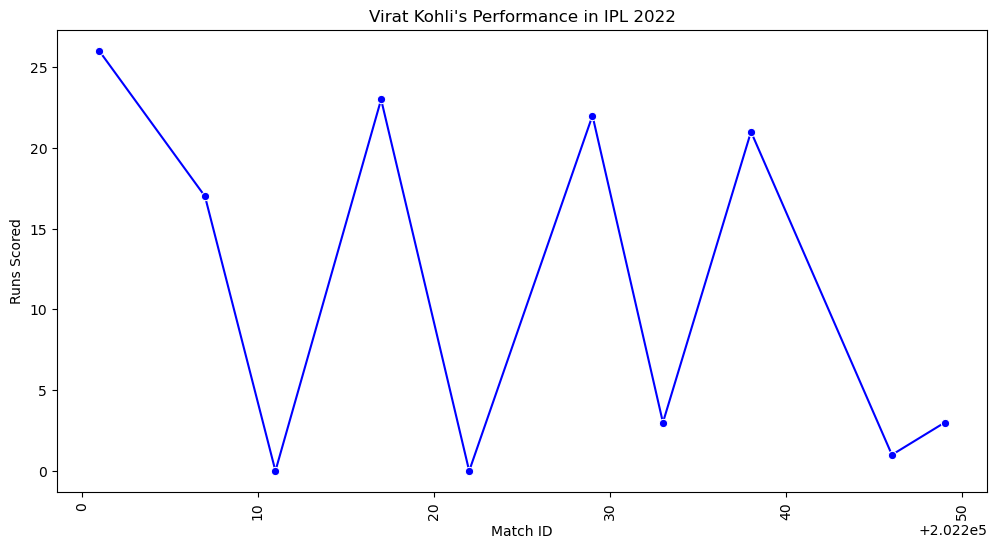

In [440]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="match_id",y="runs_of_bat",data=runs_at_matches,marker="o",color="blue")
plt.title("Virat Kohli's Performance in IPL 2022")
plt.xlabel('Match ID')
plt.ylabel('Runs Scored')
plt.xticks(rotation=90)
plt.show()